<a href="https://colab.research.google.com/github/HokhimLai/31005_ML_A2/blob/master/UTS_ML2019_A2_13056977_12418986_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### UTS Machine learnig 2019 Assignment2_Practical machine learning project
`Subject code: 31005`

`StudentID: 13056977,12418986 `

`StudentName: HokHim Lai, Shiwei Xu`

`Git_hub url: https://github.com/HokhimLai/31005_ML_A2`

#1 Introduction

This project is going to implement some simple and basic machine learning algorithm. In the Introduction of Data Analysis course, lecturer did introduced the basic dataset - __Iris dataset__. However, we analysed that dataset in KNIME with simple configuration. In this project, we are going to investigate this dataset in python from scratch. We are going to implement  basic and primary machine learning algorithms, they are _Decision tree (CART, ID3)_ and _KNeighborsClassifier_. Beside the __Iris dataset__, in order to experiment the algorithm  comprehensively, another dataset - __Wine dataset__ would also be applied. Finally, we will compare the accary to check out how the algorithm performs in different situations. The input will be the dataset and the output would be the accary of the algorithms.

#2 Exploration 

The challenge of this dataset is we don’t know the relationship and the correlation of each column yet. As we have to find out the relationship of each attribute, we decide to have some data exploration before applying the dataset into the algorithm. Before starting the exploration, we have to setup the environment that can let dataset execute welly first. We import numpy for linear algebra, pandas for data processing like read the csv file, seaborn and matplotlib for visualize the data for further analysis.



In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
url = 'https://raw.githubusercontent.com/HokhimLai/31005_ML_A2/master/Dataset/Iris.csv'
iris = pd.read_csv(url)
iris = iris.drop("Id", axis=1) #as we dont need the first coloum "ID" to analys this dataset

iris.head()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Through the _head()_ and _info()_ function, we can see that the data contain 150 entries with 6 columns. We don’t need the first column __“ID”__ for the data analyzation, therefore, first column is dropped out. The information from the function also shown there is no missing attribute, the data cleaning process is not required, the whole dataset is ready to use and explore.

### 2.1 Iris dataset exploration





In this section, we are going to explore the dataset with different mathematical process and graph, in order to find out the attribute relationship and the best attribute to train our algorithm.

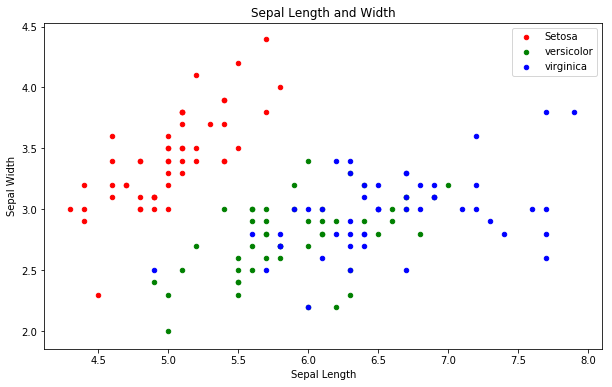

In [3]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length and Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


In this diagram, the scatter plot is spared distributedly, we can’t not tell the relationship until further exploration.


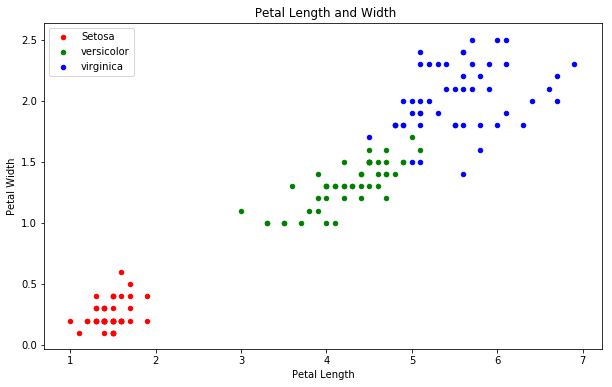

In [4]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='red', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length and Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

From the above picture, we can see the scatter of  Petal length and width is more cluster and deveined compare with Sepal. This shown that using Petal features may have a better prediction on the algorithm. 

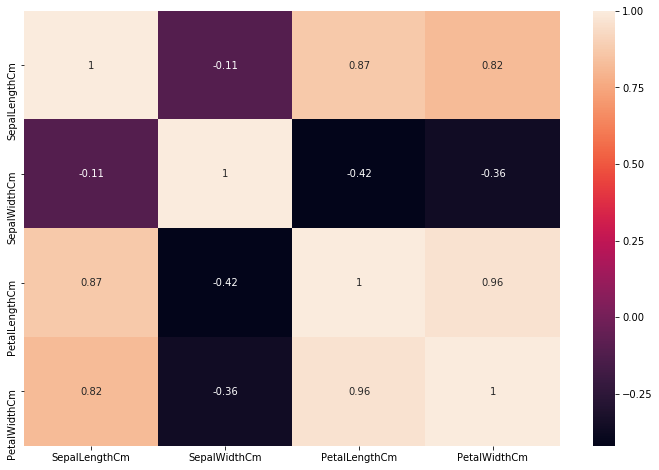

In [5]:
plt.figure(figsize=(12,8)) 
sns.heatmap(iris.corr(),annot=True) #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

Furthermore, I applied the dataset into a correlation heatmap. In the picture, we can see the SepalLengthCm and SepalWidthCm are negatively correlated. But SepalLengthCm, PetalWidthCm and PetalLengthCm appear a highly correlation. After data exploration, now we know which attribute can use to try our algorithm and test the accuracy.


# 3 Methodlogy and Evaluation



##3.1 Data Splitting

To train the dataset, we are going to divide the dataset into training set and test set. Here we are going to split the data in to 70 and 30 ratio, the large set will be the one used to train the algorithm. And after the 

In [6]:
train, test = train_test_split(iris, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


After executing the code, we can see than the train set have 105 attributes and the test set have 45 attributes. Now we can simply apply these dataset into our algorithm. Let classify our dataset more details and take the main feature to our train and test set. 

In [0]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
test_y =test.Species   

##3.2 Decision Tree Algorithm

###3.2.1 Decision tree (Gini)

In [8]:
model1 = DecisionTreeClassifier(criterion="gini")
model1.fit(train_X,train_y)
prediction = model1.predict(test_X)
print('The accuracy of the Decision Tree (Gini) is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree (Gini) is 0.9333333333333333


###3.2.2 Decision tree (ID3)

In [9]:
model2 = DecisionTreeClassifier(criterion="entropy")
model2 = model2.fit(train_X,train_y)
prediction2 = model2.predict(test_X)
print('The accuracy of the Decision Tree (ID3) is',metrics.accuracy_score(prediction2,test_y))

The accuracy of the Decision Tree (ID3) is 0.9333333333333333


###3.2.3 K-Nearest Neighbours

In [10]:
model3 = KNeighborsClassifier(n_neighbors=3) 
model3.fit(train_X,train_y)
prediction3 = model3.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction3,test_y))

The accuracy of the KNN is 0.9555555555555556


##3.3 Comparative Study on dataset _Iris_

Now we are going to compare the accary and performance  of each algorithm.

In [11]:
print('The accuracy of the Decision Tree (Gini) is',metrics.accuracy_score(prediction,test_y))
print('The accuracy of the Decision Tree (ID3) is',metrics.accuracy_score(prediction2,test_y))
print('The accuracy of the KNN is',metrics.accuracy_score(prediction3,test_y))

The accuracy of the Decision Tree (Gini) is 0.9333333333333333
The accuracy of the Decision Tree (ID3) is 0.9333333333333333
The accuracy of the KNN is 0.9555555555555556


The result is Decision Tree using Gini and ID3 both got around 93% accary and KNN got 91% accary. In this dataset, we can't really tell the difference of the algorithm performance. Therefore, we have decided to apply these algorithms to another dataset for reference.

##3.4 Application of Wine dataset

In this section, we are going to apply another dataset to test the algorithms performance. A popular dataset - Wine dataset will be used here.

In [12]:
url2 = 'https://raw.githubusercontent.com/HokhimLai/31005_ML_A2/master/Dataset/winequality-red.csv'
wine= pd.read_csv(url2)

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##3.4.1 binarization
We are going to do binarize the data in here, the original data have been classify the ‘quality’ of the wine from 1 to 5. Now we are going to classify it to either good and bad quality and put it into 2 separately class. Using function __LabelEncoder()__ allow the data encode labels with value 0 and 1.

In [0]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [0]:
label_quality = LabelEncoder()

In [15]:
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

Now we can see that under the 'quality' class, the data has been assigned into either 0 or 1 subclass. Which 0 contain 1382 attributes and1 contain 217 attributes. After these process, data is ready to apply into the training algorithms.

In [0]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Adding Standardize features by removing the mean and scaling to unit variance.

In [0]:
sc = StandardScaler()

In [0]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
model4 = DecisionTreeClassifier(criterion="gini")
model4.fit(X_train,y_train)
prediction4 = model4.predict(X_test)
print('The accuracy of the Decision Tree (Gini) is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree (Gini) is 0.8395833333333333


In [21]:
model5 = DecisionTreeClassifier(criterion="entropy", max_depth=6)
model5 = model5.fit(X_train,y_train)
prediction5 = model5.predict(X_test)
print('The accuracy of the Decision Tree (ID3)is',metrics.accuracy_score(prediction5,y_test))

The accuracy of the Decision Tree (ID3)is 0.8666666666666667


In [22]:
model6=KNeighborsClassifier(n_neighbors=3) 
model6.fit(X_train,y_train)
prediction6=model6.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the KNN is 0.8625


##3.4.2 Comparative Study on dataset _Wine_

Now we are going to compare the accary and performance  of each algorithm.

In [23]:
print('The accuracy of the Decision Tree (Gini) is',metrics.accuracy_score(prediction4,y_test))
print('The accuracy of the Decision Tree (ID3) is',metrics.accuracy_score(prediction5,y_test))
print('The accuracy of the KNN is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the Decision Tree (Gini) is 0.8395833333333333
The accuracy of the Decision Tree (ID3) is 0.8666666666666667
The accuracy of the KNN is 0.8625


#4 Conclusion

After all the testing, we found out that different algorithms behave variously on different dataset. But all of them can get quite result. In the middle of the project, we try to compare which algorithm will be the best or the smartest one, however, we found out that only one or two dataset cannot indicate the performance of the algorithm. Because based on different circumstances, the algorithm will behave differently. Even though in the same caretory “Decision Tree”, the GINI and ID3 configuration will result in a different accuracy. Furthermore, the setting  on neighbors from 1 to 10 will also produce a different result. Through all these observation, we agree that we are not trying to build or apply the best machine learning algorithm, but find the finest algorithm that can perfectly complicate to the dataset. 

Finally, due to the lack of knowledge of our python programming skills, we can't not made a lot of functions and use all the graph properly in the report. However, we did tried our best to figure out how the machine learning progress work in a python system. By looking into these process, we learn how to data should be handled for machine algorithm learning.  By using different algorithms, we gain the knowledge of the benefits and drawbacks when using different models in different situations. One of our challenges is we are insufficient of using graph or method to compare the result of the model. We are looking forward to gain more knowledge and improve in this area.

# 5 Eithical issue

Machine learning undoubtedly plays an important role in analysis based on large amounts of data. According to the utilitarian approach evaluates behavior based on its consequences or outcomes. When performing the algorithm on these data which need careful classification, it needs a lot of professional knowledge support, just like the classification of wine grade in this paper. It not only includes the knowledge of wine professional knowledge, but also integrates programming statistics and other fields. Lack of any kind of knowledge can have a great impact on the final outcome. Misjudgment will directly affect the value of the whole thing. 

Also, the Kantian ethics supported that for an action to be permissible, it must be possible to apply it to all people without a contradiction occurring, Therefore, although our original intention is to use machine learning algorithm for more convenient analysis, because machine learning technology is not fully accepted by the society at present, the arrival of new technologies will inevitably affect the traditional process, just like wine connoisseurs, although they may not be as fast as machines, often they can be more accurately than machines according to experience accumulates and there must be contradiction between them. Therefore, machine learning algorithm, a new technology, still needs to be carefully considered before it is widely used in various fields. It is necessary to balance the relationship between traditional technology and machine learning algorithm.
